In [723]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, linewidth=2*75, suppress=False)
from IPython.display import clear_output
from rise_and_fall import *
import json

In [ ]:
f = pd.read_csv("database/BTCUSDT.csv")

In [ ]:
nf = pd.DataFrame()
nf["stime"] = f.loc[:, "0"]
nf["meanp"] = f.loc[:, [str(i) for i in [1,2,3,4]]].mean(axis=1)
nf["stdp"] = f.loc[:, [str(i) for i in [1,2,3,4]]].std(axis=1)
nf["bvol"] = f.loc[:, "10"]
nf["svol"] = f.loc[:, "7"]-f.loc[:, "10"]
nf["ntrds"] = f.loc[:, "8"]
display(nf.head())
print(nf.columns.to_list())

In [322]:
def get_frame(at=50000, length=288):
    return nf.iloc[at:at+length, :]

def plot_frame(f, mxis=[], mnis=[], mark=None):
    ps = f["meanp"].to_numpy()
    mn = ps.min()
    mx = ps.max()
    plt.plot(ps)
    if len(mxis)>0:
        plt.vlines(x = mxis, ymin = mn, ymax = mx, colors = 'green',)
    if len(mnis)>0:
        plt.vlines(x = mnis, ymin = mn, ymax = mx, colors = 'red',)
    if mark is not None:
        plt.vlines(x = [mark], ymin = mn, ymax = mx, colors = 'blue',)
    
def unique(xs):
    ys = []
    for x in xs:
        if x in ys:
            continue
        ys.append(x)
    return ys

In [ ]:
index = np.random.randint(0,nf.shape[0]-288)
ff = get_frame(at=index, length=288)

In [621]:
ffis = []
required_frames = 256
is_changed=False
while len(ffis)<required_frames:
    index = np.random.randint(0,nf.shape[0]-288)
    ff = get_frame(at=index, length=288)
    chs = []
    # mxis, mnis, ch = finfo_opt(ff, fee=0.002)
    mxis, mnis, ch = finfo(ff, fee=0.002, bahead=60, sahead=24)
    if ch>=0.55:
        ffis.append(index)
        is_changed=True
    if is_changed:
        is_changed = False
        clear_output(wait=True)
        print(f"{len(ffis)/required_frames * 100} % completed")

100.0 % completed


0.18980786948382175


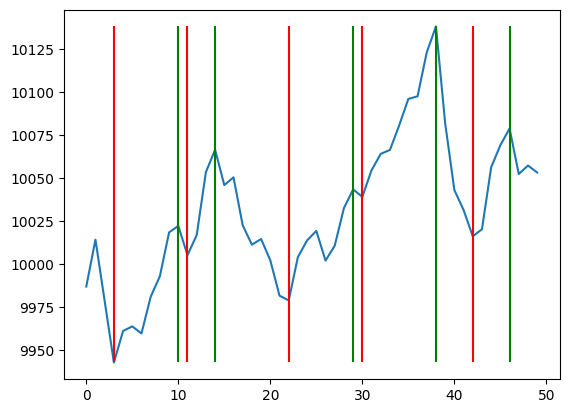

In [708]:
mxis, mnis, ch = finfo_opt(ff, fee=0.005)
plot_frame(ff[:50], mxis=np.array(mxis)[np.array(mxis)<50], mnis=np.array(mnis)[np.array(mnis)<50])
print(ch)

In [687]:
fff = pd.DataFrame()
fff["dtime"]=pd.to_datetime(ff['stime'], unit='ms')
fff["dtime"] = fff["dtime"].apply(lambda x:x.weekday()) #mon=0, sun=6

In [690]:
pd.to_datetime(ff['stime'], unit='ms')

69081   2018-04-15 21:00:00
69082   2018-04-15 21:05:00
69083   2018-04-15 21:10:00
69084   2018-04-15 21:15:00
69085   2018-04-15 21:20:00
                ...        
69364   2018-04-16 20:35:00
69365   2018-04-16 20:40:00
69366   2018-04-16 20:45:00
69367   2018-04-16 20:50:00
69368   2018-04-16 20:55:00
Name: stime, Length: 288, dtype: datetime64[ns]

,stime,meanp,stdp,bvol,svol,ntrds
0,1502942400000,4266.2500,9.540000,2.089105e+03,7.244516e+03,9
1,1502942700000,4261.4800,0.000000,0.000000e+00,0.000000e+00,0
2,1502943000000,4261.4800,0.000000,0.000000e+00,0.000000e+00,0
3,1502943300000,4262.3300,1.700000,3.642181e+02,1.701230e+03,9
4,1502943600000,4265.5850,0.814064,6.595688e+03,3.335473e+03,11
...,...,...,...,...,...,...
507337,1655649600000,19407.7675,21.179544,1.221985e+06,1.507733e+06,3158
507338,1655649900000,19441.1350,50.486409,3.733287e+06,2.583648e+06,5695
507339,1655650200000,19441.9500,26.243864,1.314362e+06,1.323873e+06,3221
507340,1655650500000,19464.1450,35.660919,1.805401e+06,1.449675e+06,3461
